# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Prabha Sapkota

### GitHub Repo: https://github.com/prabhasapkota/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Prerequisties

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packa

## Question 1:
Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests

# URL of the article
url = "https://www.cbsnews.com/news/how-often-total-solar-eclipses-happen/"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to 'article.html'")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)

Article HTML content has been saved to 'article.html'


In [6]:
from bs4 import BeautifulSoup

# Read the HTML content from the saved file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML and extract plain text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Save plain text to a new file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Article content has been saved to 'article.txt'")

Article content has been saved to 'article.txt'


## Question 2:
Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [10]:
import nltk
from bs4 import BeautifulSoup
from textblob import TextBlob

# Download the 'punkt' tokenizer model from NLTK
nltk.download('punkt')

# Read the HTML content from the file
with open("article.html", "r", encoding="utf-8") as f:
    html_content = f.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the article text using appropriate tags or class names
# In this case, let's assume the article text is contained within <p> tags
article_paragraphs = soup.find_all("p")

# Concatenate the text of all paragraphs to get the full article text
article_text = "\n".join([p.get_text() for p in article_paragraphs])

# Perform sentiment analysis on the article text
article_blob = TextBlob(article_text)
polarity_score = article_blob.sentiment.polarity

# Print the polarity score with an appropriate label
print("Polarity Score:", polarity_score)

# Count the number of sentences in the original article
num_sentences = len(article_blob.sentences)

# Print the number of sentences with an appropriate label
print("Number of Sentences in the Original Article:", num_sentences)


Polarity Score: 0.1075241046831956
Number of Sentences in the Original Article: 25


[nltk_data] Downloading package punkt to /Users/prabha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Question 3:
 Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [15]:
import spacy
from collections import Counter

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Read the article text from the .txt file
with open("article.txt", "r", encoding="utf-8") as f:
    article_text = f.read()

# Process the article text with spaCy
doc = nlp(article_text)

# Tokenize the text and convert tokens to lowercase
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each token
token_freq = Counter(tokens)

# Identify the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the common tokens with appropriate label
print("5 Most Frequent Tokens (converted to lowercase):")
for token, freq in most_common_tokens:
    print(token)

# Print the tokens and their frequencies with appropriate labels
print("\nToken Frequencies:")
for token, freq in token_freq.items():
    print(f"{token}: {freq}")

5 Most Frequent Tokens (converted to lowercase):
eclipse
solar
total
cbs
news

Token Frequencies:
total: 21
solar: 26
eclipses: 4
happen: 2
monday: 2
rare: 6
cbs: 18
news: 18
latest: 1
u.s.: 7
world: 2
politics: 2
entertainment: 2
healthwatch: 2
moneywatch: 2
crime: 2
sports: 2
local: 1
baltimore: 2
bay: 2
area: 2
boston: 2
chicago: 2
colorado: 2
detroit: 2
los: 2
angeles: 2
miami: 2
minnesota: 2
new: 4
york: 4
philadelphia: 2
pittsburgh: 2
sacramento: 2
texas: 4
live: 3
streaming: 1
shows: 1
48: 1
hours: 1
60: 1
minutes: 1
america: 4
decides: 1
evening: 1
mornings: 2
eye: 1
reports: 1
saturday: 1
morning: 2
dish: 1
face: 1
nation: 1
comes: 1
sun: 6
person: 2
prime: 1
time: 2
sunday: 1
takeout: 1
uplift: 1
weekender: 1
2024: 7
eclipse: 28
photos: 1
podcasts: 1
depth: 1
newsletters: 1
download: 1
app: 2
team: 2
executive: 1
paramount: 1
shop: 1
paramount+: 2
join: 1
talent: 1
community: 1
rss: 1
feeds: 1
moment: 1
innovators: 1
disruptors: 1
essentials: 1
watch: 2
kerry: 3
breen: 3
upda

### Question 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [16]:
import spacy
from collections import Counter

# Load English pipeline
nlp = spacy.load("en_core_web_sm")

# Load the article text
with open("article.txt", "r") as file:
    article_text = file.read()

# Process the text using spaCy
doc = nlp(article_text)

# Extract lemmas and count their frequencies
lemma_counter = Counter([token.lemma_.lower() for token in doc])

# Get the 5 most common lemmas
common_lemmas = lemma_counter.most_common(5)

print("5 Most Frequent Lemmas:")
for lemma, frequency in common_lemmas:
    print(f"{lemma}: {frequency}")

print("\nLemmas with Frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")


5 Most Frequent Lemmas:



: 78
the: 52
eclipse: 32
,: 30
.: 28

Lemmas with Frequencies:


    : 1
how: 4
often: 4
total: 21
solar: 26
eclipse: 32
happen: 2
—: 2
and: 15
why: 2
monday: 2
's: 5
be: 24
so: 2
rare: 6
-: 1
cbs: 18
news: 18

















: 1
late: 1


: 10
u.s.: 7



: 78
world: 2
politics: 2
entertainment: 2
healthwatch: 2
moneywatch: 2
crime: 2
sports: 2




: 5
local: 1
baltimore: 2
bay: 2
area: 4
boston: 2
chicago: 2
colorado: 2
detroit: 2
los: 2
angeles: 2
miami: 2
minnesota: 2
new: 4
york: 4
philadelphia: 2
pittsburgh: 2
sacramento: 2
texas: 4
live: 3
streaming: 1
show: 1
48: 1
hour: 1
60: 1
minutes: 1
america: 4
decides: 1
evening: 1
mornings: 2
eye: 1
on: 10
reports: 1
saturday: 1
morning: 2
the: 52
dish: 1
face: 2
nation: 1
here: 1
come: 1
sun: 6
person: 2
to: 16
prime: 1
time: 2
sunday: 1
takeout: 1
uplift: 1
weekender: 1







: 2
2024: 7
photos: 1
podcast: 1
in: 13
depth: 1
newsletters: 1
download: 1
our: 3
app: 2
team: 2
executive: 1
paramount: 1
shop: 1
p

### Question 5:
 Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

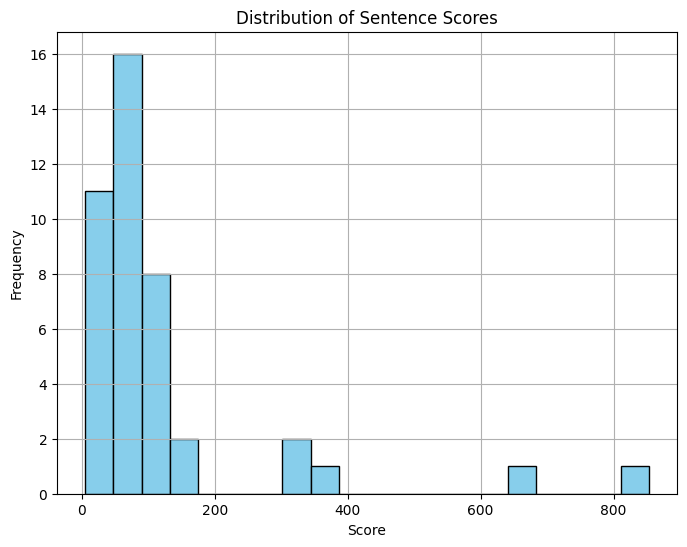

In [17]:
import matplotlib.pyplot as plt

# Tokenize sentences and calculate scores
sentence_scores = []
for sentence in doc.sents:
    score = sum(len(token.text) for token in sentence)
    sentence_scores.append(score)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?